In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
sys.path.insert(0,'../../..')
import gp2
from gp2 import Runner
from keras import losses, metrics
from tensorflow.keras import optimizers

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [3]:
R = Runner(classifier='kattunet2d',
           filter_num=[16, 32, 64, 128, 256],
           stack_num_down=2,
           stack_num_up=2,
           activation='ReLU',
           atten_activation='ReLU',
           attention='add',
           output_activation='Sigmoid',
           batch_norm=False,
           pool=False,
           unpool=False,
           weights='imagenet',
           optimizer= None, #None = default is optimizers.Adam(learning_rate=1e-3)
           loss=None, #None = default is losses.binary_crossentropy
           metric=None # None = default is Util.dice_coef
          )

*** GP2 KATTUnet2D ***
Working directory: /tmp/tmpur466i7gGP2
Using default discriminator (CNN)


In [4]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/COVID/Covid_images_norm.npy')
masks = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/COVID/Covid_masks_norm.npy')

In [5]:
images.shape

(3616, 512, 512, 1)

In [6]:
masks.shape

(3616, 512, 512, 1)

In [7]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [8]:
R.run(images=images, masks=masks, weights=weights, runs=8)

Weights OK!
******
Loop 1
Epoch 1/100
3/3 [==============================] - 24s 6s/step - loss: 0.6942 - dice_coeff: 0.3593 - val_loss: 0.6938 - val_dice_coeff: 0.3623
Epoch 2/100
3/3 [==============================] - 3s 1s/step - loss: 0.6935 - dice_coeff: 0.3595 - val_loss: 0.6931 - val_dice_coeff: 0.3622
Epoch 3/100
3/3 [==============================] - 3s 1s/step - loss: 0.6929 - dice_coeff: 0.3602 - val_loss: 0.6926 - val_dice_coeff: 0.3621
Epoch 4/100
3/3 [==============================] - 3s 1s/step - loss: 0.6924 - dice_coeff: 0.3601 - val_loss: 0.6921 - val_dice_coeff: 0.3619
Epoch 5/100
3/3 [==============================] - 3s 1s/step - loss: 0.6918 - dice_coeff: 0.3587 - val_loss: 0.6914 - val_dice_coeff: 0.3617
Epoch 6/100
3/3 [==============================] - 3s 1s/step - loss: 0.6910 - dice_coeff: 0.3580 - val_loss: 0.6905 - val_dice_coeff: 0.3615
Epoch 7/100
3/3 [==============================] - 3s 1s/step - loss: 0.6901 - dice_coeff: 0.3591 - val_loss: 0.6895 - va

In [9]:
R.classifier_scores

[[0.3712693750858307, 0.4465622007846832],
 [0.3394429087638855, 0.47218817472457886]]

In [10]:
R.discriminator_scores

[[0.0, 1.0], [324.7096252441406, 0.5231481194496155]]

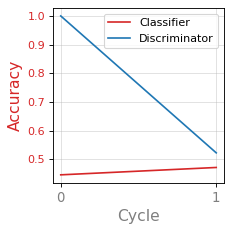

In [11]:
R.plot()